In [159]:
#Load libraries
import scipy.io
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from subprocess import call
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sn

In [142]:
#Load Labels
hyp01 = scipy.io.loadmat('SC4001E0-PSG_hyp')
hyp11 = scipy.io.loadmat('SC4011E0-PSG_hyp')
hyp12 = scipy.io.loadmat('SC4012E0-PSG_hyp')
hyp21 = scipy.io.loadmat('SC4021E0-PSG_hyp')
hyp22 = scipy.io.loadmat('SC4022E0-PSG_hyp')
hyp31 = scipy.io.loadmat('SC4031E0-PSG_hyp')
hyp32 = scipy.io.loadmat('SC4032E0-PSG_hyp')
hyp41 = scipy.io.loadmat('SC4041E0-PSG_hyp')
hyp42 = scipy.io.loadmat('SC4042E0-PSG_hyp')
hyp51 = scipy.io.loadmat('SC4051E0-PSG_hyp')

hyp01 = hyp01['hypnogram'][799:1633]
hyp11 = hyp11['hypnogram'][799:1633]
hyp12 = hyp12['hypnogram'][799:1633]
hyp21 = hyp21['hypnogram'][799:1633]
hyp22 = hyp22['hypnogram'][799:1633]
hyp31 = hyp31['hypnogram'][799:1633]
hyp32 = hyp32['hypnogram'][799:1633]
hyp41 = hyp41['hypnogram'][799:1633]
hyp42 = hyp42['hypnogram'][799:1633]
hyp51 = hyp51['hypnogram'][799:1633]

hypt = np.concatenate((hyp01, hyp11, hyp12, hyp21, hyp22, hyp31, hyp32, hyp41, hyp42, hyp51), axis = 0)

###Load in features
data1 = scipy.io.loadmat('features(10)_cwt.mat')['features']

data01 = data1[(799):(1633),:]
data02 = data1[(799+((1)*1633)):(1633+((1)*1633)),:]
data03 = data1[(799+(2)*1633):(1633+(2)*1633),:]
data04 = data1[(799+(3)*1633):(1633+(3)*1633),:]
data05 = data1[(799+(4)*1633):(1633+(4)*1633),:]
data06 = data1[(799+(5)*1633):(1633+(5)*1633),:]
data07 = data1[(799+(6)*1633):(1633+(6)*1633),:]
data08 = data1[(799+(7)*1633):(1633+(7)*1633),:]
data09 = data1[(799+(8)*1633):(1633+(8)*1633),:]
data10 = data1[(799+(9)*1633):(1633+(9)*1633),:]

data = np.concatenate((data01, data02, data03, data04, data05, data06, data07, data08, data09, data10), axis = 0)



#Changing labels to New AASM:
m, n = hypt.shape
for i in range(m):
    if hypt[i,1]==4:
        hypt[i,1]=3
    elif hypt[i,1]==6:
        hypt[i,1]=0

# Single Random Forest

In [143]:
#Initialize Random Forest and split testing and training sets
clf = RandomForestClassifier(n_estimators=40, criterion = 'entropy', oob_score=True)
X_train, X_test, Y_train, Y_test = train_test_split(data, hypt[:,1], test_size=0.1)

clf.fit(X_train, Y_train)
pred = clf.predict(X_test)

In [177]:
#Create confusion matrix
aa = pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames = ['Predicted'])
aa

Predicted,0,1,2,3,5
Actual,,,,,
0,132,6,2,0,1
1,12,17,26,0,14
2,1,8,368,24,17
3,0,0,18,70,0
5,2,3,19,0,94


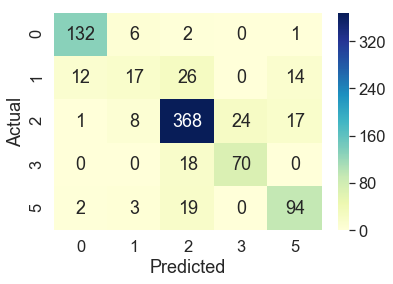

In [181]:
sn.set(font_scale=1.5)
htmap = sn.heatmap(aa, annot=True,annot_kws={"size": 18}, fmt='g', cmap='YlGnBu')
htmap.figure.savefig('heatmap.png')

In [145]:
clf.score(X_test, Y_test)

0.8165467625899281

In [156]:
#est = clf.estimators_[3]
#export_graphviz(est, out_file='tree.dot', 
#                class_names = ['W', 'N1', 'N2', 'N3', 'REM'],
#                rounded = True, proportion = False, 
#                precision = 2, filled = True)
#
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
#Image(filename = 'tree.png')

# K-Fold

In [146]:
#Creates
def get_score(rf, x_train, x_test, y_train, y_test):
    rf.fit(x_train, y_train)
    return rf.score(x_test, y_test)

In [147]:
#Cross Validation with K = 10
kf = KFold(n_splits = 10, shuffle=True)



scores = []
for train_index, test_index in kf.split(data, hypt[:,1]):
    x_train, x_test = data[train_index], data[test_index]
    y_train, y_test = hypt[:,1][train_index], hypt[:,1][test_index]
    scores.append(get_score(clf, x_train, x_test, y_train, y_test))
    

In [148]:
scores

[0.8081534772182254,
 0.8081534772182254,
 0.8117505995203836,
 0.8213429256594724,
 0.8009592326139089,
 0.802158273381295,
 0.8081534772182254,
 0.8177458033573142,
 0.7877697841726619,
 0.8069544364508393]